In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


(<module 'seaborn' from 'C:\\Users\\Gourav\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>,
 set())

Importing Dataset

In [2]:
titanic_data=pd.read_csv('train (1).csv')
titanic_test=pd.read_csv('test.csv')

Performing Exploratory Data Analysis

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.shape

(891, 12)

In [5]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Checking various null enteries in the dataset

In [6]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Visualization of various relationships between variables

<AxesSubplot:xlabel='Survived', ylabel='count'>

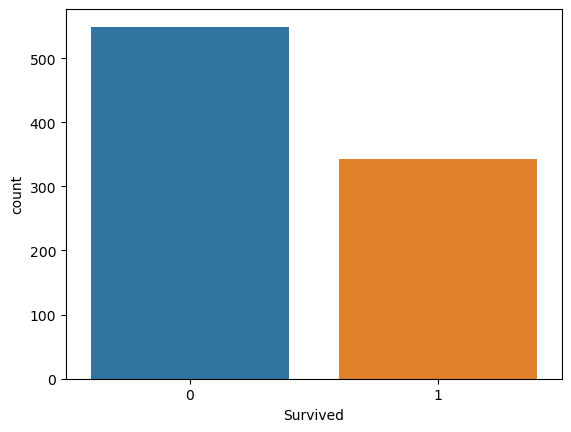

In [7]:
sns.countplot(x='Survived', data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

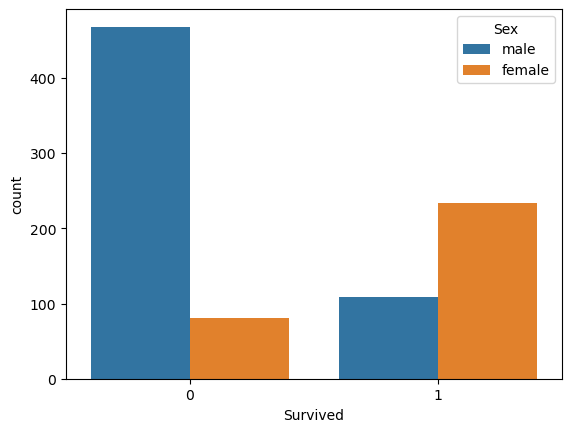

In [8]:
sns.countplot(x='Survived',hue='Sex', data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

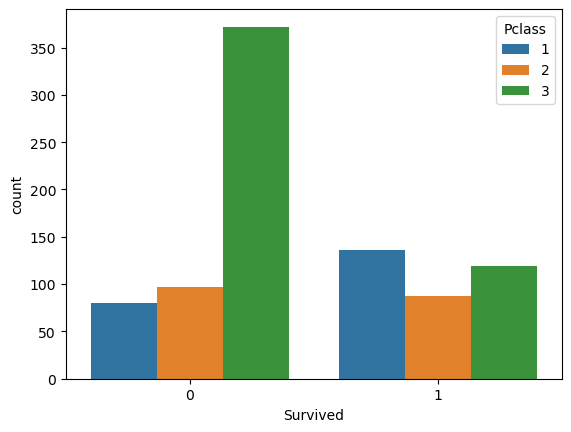

In [9]:
sns.countplot(x='Survived',hue='Pclass', data=titanic_data)

Replacing null values in Age column using function

In [10]:
def add_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return titanic_data[titanic_data['Pclass']==1]['Age'].mean()
        elif Pclass==2:
            return titanic_data[titanic_data['Pclass']==2]['Age'].mean()
        elif Pclass==3:
            return titanic_data[titanic_data['Pclass']==3]['Age'].mean()
    else:
        return Age

In [11]:
df=titanic_data

In [12]:
df['Age']=df[['Age','Pclass']].apply(add_age,axis=1)

Convert sex and embarked columns to numerical values

In [13]:
df.Sex=df.Sex.map({'female':0, 'male':1})
df.Embarked=df.Embarked.map({'S':0, 'C':1, 'Q':2, 'nan':'NaN'})

Dropping Null Data

In [14]:
df.drop('Cabin',axis=1,inplace=True)

Removing rows with null values

In [15]:
df.dropna(inplace=True)

In [16]:
df.drop(['Name', 'PassengerId', 'Ticket'], axis = 1, inplace = True)

Feature engineering

In [17]:
min_age=min(df.Age)
max_age=max(df.Age)
min_fare=min(df.Fare)
max_fare=max(df.Fare)

In [51]:
df.Age = (df.Age-min_age)/(max_age-min_age)
df.Fare = (df.Fare-min_fare)/(max_fare-min_fare)

Print the finalised data

In [19]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.271174,1,0,0.014151,0
1,1,1,0,0.472229,1,0,0.139136,1
2,1,3,0,0.321438,0,0,0.015469,0
3,1,1,0,0.434531,1,0,0.103644,0
4,0,3,1,0.434531,0,0,0.015713,0


Split the data set into x and y data

In [20]:
x_data=df.drop('Survived',axis=1)
y_data=df['Survived']

Split the data set into training data and test data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.2, random_state=0, stratify=y_data)

Create the model

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()

Train the model and create predictions

In [26]:
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)

Let’s see how accurate is our model for predictions:

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       110
           1       0.81      0.79      0.80        68

    accuracy                           0.85       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.85      0.85      0.85       178



In [29]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test_data, predictions))

Accuracy :  0.848314606741573


Let’s see the confusion matrix

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_data, predictions)

array([[97, 13],
       [14, 54]], dtype=int64)

confusion matrix using seaborn

In [32]:
cf_matrix=confusion_matrix(y_test_data, predictions)

<AxesSubplot:>

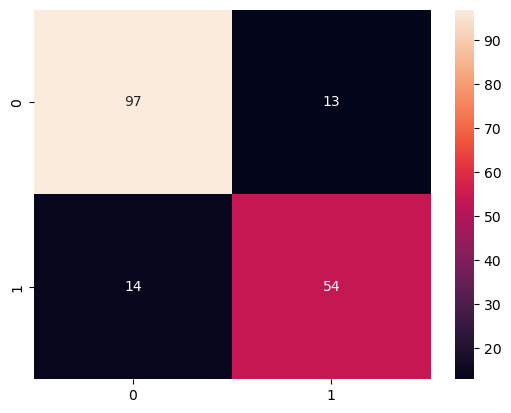

In [33]:
import seaborn as sns

sns.heatmap(cf_matrix, annot=True)

Cleaning test datset

In [34]:
df1=titanic_test

In [35]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
df1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [37]:
df1['Age']=df1[['Age','Pclass']].apply(add_age,axis=1)

In [38]:
df1['Fare']=df1['Fare'].fillna(df1['Fare'].median())

In [39]:
df1.Sex=df1.Sex.map({'female':0, 'male':1})
df1.Embarked=df1.Embarked.map({'S':0, 'C':1, 'Q':2, 'nan':'NaN'})

In [40]:
min_age1=min(df1.Age)
max_age1=max(df1.Age)
min_fare1=min(df1.Fare)
max_fare1=max(df1.Fare)

In [41]:
df1.Age = (df1.Age-min_age1)/(max_age1-min_age1)
df1.Fare = (df1.Fare-min_fare1)/(max_fare1-min_fare1)

In [42]:
df1.drop(['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [43]:
df1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.452723,0,0,0.015282,2
1,3,0,0.617566,1,0,0.013663,0
2,2,1,0.815377,0,0,0.018909,2
3,3,1,0.353818,0,0,0.016908,0
4,3,0,0.287881,1,1,0.023984,0


Prediction

In [44]:
prediction=model.predict(df1)

In [45]:
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [47]:
test=pd.read_csv('test.csv')

In [48]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": prediction})
submission.to_csv('submission.csv', index=False)

In [49]:
pred_df = pd.read_csv('submission.csv')

<AxesSubplot:xlabel='Survived', ylabel='count'>

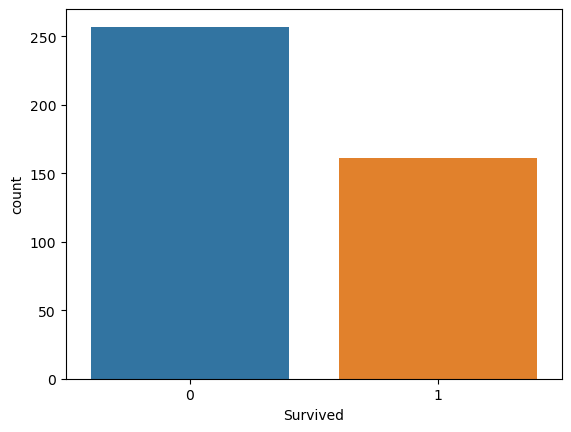

In [50]:
sns.countplot(x='Survived', data=pred_df)